### **Chapter 02. 와인 분류 문제**

In [ ]:
import pandas as pd

wine = pd.read_csv("./wine_csv_data.csv")

print(type(wine))
wine

<class 'pandas.core.frame.DataFrame'>


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
wine.head(3)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0


In [ ]:
wine.tail(4)

,alcohol,sugar,pH,class
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0
6496,11.8,0.8,3.26,1.0


In [ ]:
wine.info()   # information: n. 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()  # v. (기초통계량)기술하다, 묘사하다

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [ ]:
input_data = wine[['alcohol', 'sugar', 'pH']]

print(type(input_data))
input_data

<class 'pandas.core.frame.DataFrame'>


,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51
...,...,...,...
6492,11.2,1.6,3.27
6493,9.6,8.0,3.15
6494,9.4,1.2,2.99
6495,12.8,1.1,3.34


In [ ]:
x = input_data.to_numpy()   # 넘파이 배열로 바꿀 때 사용하는 메서드

print(type(x))
print(x.shape)
x

<class 'numpy.ndarray'>
(6497, 3)


array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [ ]:
y = wine[['class']]   # 잘못된 사용!

print(type(y))
print(y.shape)
y.head(3)

<class 'pandas.core.frame.DataFrame'>
(6497, 1)


,class
0,0.0
1,0.0
2,0.0


In [ ]:
y = wine['class']   # 올바른 사용!

print(type(y))
print(y.shape)
y.head(3)

<class 'pandas.core.series.Series'>
(6497,)


0    0.0
1    0.0
2    0.0
Name: class, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    # test_size=0.2,
                                                    train_size=0.8,
                                                    random_state=42)

print(x_train.shape, x_test.shape) # 80%:20% = 4:1 = 5200:1300
print(y_train.shape, y_test.shape)

(5197, 3) (1300, 3)
(5197,) (1300,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# 변환기 클래스: fit, transform, fit_transform
# 추정기 클래스: fit, score, predict

ss = StandardScaler()

ss.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [ ]:
print(x_train)

[[10.5   7.7   3.19]
 [12.4   2.1   3.26]
 [11.8   2.1   3.41]
 ...
 [ 9.5   5.6   3.24]
 [ 9.5   8.    3.18]
 [ 9.5   2.7   3.51]]


In [ ]:
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

print(x_train_scaled)

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 ...
 [-0.82568214  0.0267578   0.14437512]
 [-0.82568214  0.52716215 -0.23153545]
 [-0.82568214 -0.57789745  1.83597265]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(x_train, y_train)

print("학습 데이터셋:", kn.score(x_train, y_train))
print("시험 데이터셋:", kn.score(x_test, y_test))

학습 데이터셋: 0.9037906484510294
시험 데이터셋: 0.8553846153846154


In [ ]:
kn.fit(x_train_scaled, y_train)

print("학습 데이터셋:", kn.score(x_train_scaled, y_train))
print("시험 데이터셋:", kn.score(x_test_scaled, y_test))

학습 데이터셋: 0.90186646142005
시험 데이터셋: 0.8338461538461538


In [ ]:
score = 0
hist = []
for n in range(2, 101, 2):
    kn.n_neighbors = n

    tmp = kn.score(x_train_scaled, y_train)
    hist.append(tmp)
    if score < tmp:
        score = tmp
        best_k = n

print("최적의 k 값:", best_k)
print("최고 정확도:", score)

최적의 k 값: 2
최고 정확도: 0.9326534539157206


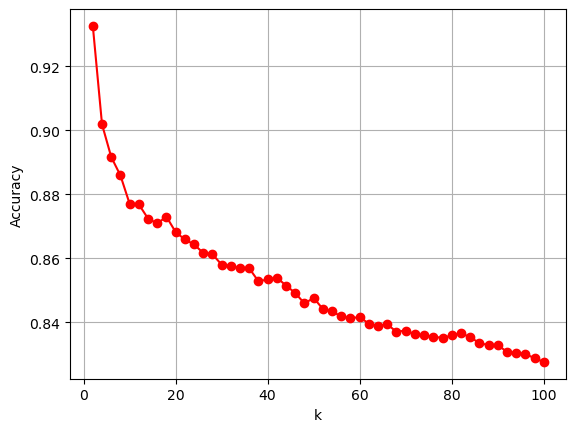

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.plot(np.arange(2, 101, 2), hist, marker='o', color="red")
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train_scaled, y_train)

print("학습 데이터셋:", dt.score(x_train_scaled, y_train))
print("시험 데이터셋:", dt.score(x_test_scaled, y_test))

# 과대적합이 발생함!

학습 데이터셋: 0.996921300750433
시험 데이터셋: 0.8592307692307692


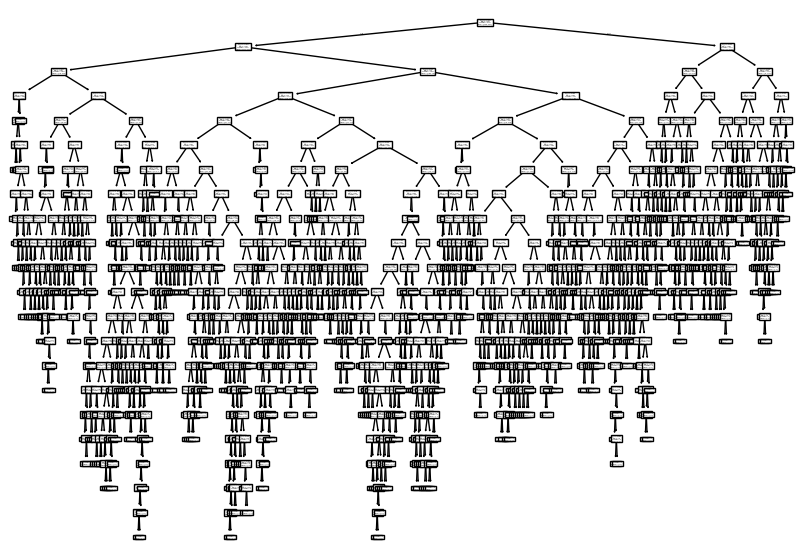

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))  # 가로: 10 inch, 세로: 7 inch
plot_tree(dt)
plt.show()